In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_helper import *

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
log_name = "linear_regression"

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
for normalize in (True, False):
    check_on_dataset(LinearRegression, "lin_reg", log_name, normalize = normalize)

In [5]:
for normalize in (True, False):
    check_on_dataset(scaled_model, "scaled_lin_reg", log_name, final_model = LinearRegression, normalize = normalize)

In [6]:
for n_features in range(1, 15):
    for normalize in (True, False):
        check_on_dataset(PCA_model, "PCA_lin_reg", log_name, final_model = LinearRegression, n_components = n_features, normalize = normalize)

We broadly see that normalization doesn't matter 

In [7]:
from sklearn.linear_model import Ridge

In [8]:
alpha_vals = [10**i for i in range(-5, 5)]

In [9]:
subset_scores = {}
for subset in subsets:
    subset_scores[subset] = []
    for alpha in alpha_vals:
        model = Ridge(alpha = alpha)
        model.fit(dataset_in["train"][subset], dataset_in["train"]["y"])
        subset_scores[subset].append(model.score(dataset_in["val"][subset], dataset_in["val"]["y"]))

In [10]:
subset_scores

{'dist_remoteness': [0.923729559312155,
  0.9237295593119776,
  0.9237295593102023,
  0.9237295592924487,
  0.9237295591149128,
  0.9237295573394587,
  0.9237295395752546,
  0.9237293609676526,
  0.923727478878935,
  0.9236995782947631],
 'dist': [0.8849307460963965,
  0.8849307460964035,
  0.884930746096473,
  0.8849307460971698,
  0.8849307461041358,
  0.8849307461737951,
  0.8849307468703599,
  0.8849307538330475,
  0.8849308231640379,
  0.8849314868966756],
 'full': [0.9277916405301265,
  0.9277916312360004,
  0.9277915382406685,
  0.9277906029380547,
  0.927780769298703,
  0.9276658205321129,
  0.9271613076720463,
  0.926686527654079,
  0.9262004957504117,
  0.9260474002236608],
 'dist_time': [0.9149941635057891,
  0.9149941635055837,
  0.9149941635035307,
  0.9149941634829996,
  0.9149941632776873,
  0.9149941612244852,
  0.9149941406844677,
  0.9149939344850462,
  0.914991792919259,
  0.9149627618145805],
 'simd': [0.23559730953769198,
  0.23559724345628097,
  0.2355965797647100

We checked regularisation weights - don't seem to matter much apart from simd where larger values perform worse

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
X_train = dataset_in["train"]["dist_time"]
y_train = dataset_in["train"]["y"]

X_val = dataset_in["val"]["dist_time"]
y_val = dataset_in["val"]["y"]

In [13]:
polynomial_scores = []

k = 0
best_score = -10e6
while k < 100:
    model = Pipeline([("poly", PolynomialFeatures(degree = k)), ("linreg", LinearRegression())])
    model.fit(X_train, y_train)
    score = model.score(X_val, y_val)
    polynomial_scores.append((k, score))
    k += 1
    if score > best_score:
        best_score = score
    else:
        break
    
polynomial_scores

[(0, -0.00034025037611162823),
 (1, 0.914994163505812),
 (2, 0.9273952561765438),
 (3, 0.9337394316274046),
 (4, 0.9365301813728356),
 (5, 0.9377635095480619),
 (6, 0.9387701286712479),
 (7, 0.9363071137485102)]

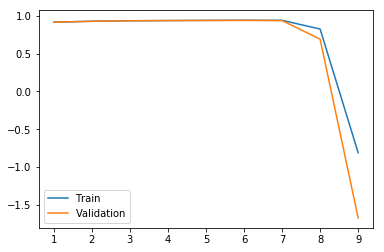

In [14]:
train_scores = []
val_scores = []
K = 10


for k in range(1, K):
    model = Pipeline([("poly", PolynomialFeatures(degree = k)), ("linreg", LinearRegression())])
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    val_scores.append(model.score(X_val, y_val))
    
    
plt.plot(range(1, K), train_scores, label = "Train")
plt.plot(range(1, K), val_scores, label = "Validation")
plt.legend()
plt.show()

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.539215e-18
  overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.325293e-23
  overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number6.843106e-28
  overwrite_a=True).T
C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition n

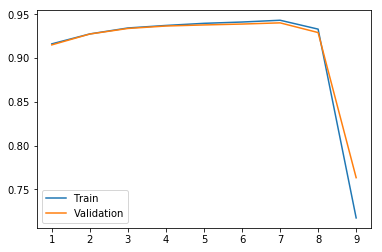

In [15]:
train_scores = []
val_scores = []
K = 10


for k in range(1, K):
    model = Pipeline([("poly", PolynomialFeatures(degree = k)), ("linreg_reg", Ridge(alpha = 1))])
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    val_scores.append(model.score(X_val, y_val))
    
    
plt.plot(range(1, K), train_scores, label = "Train")
plt.plot(range(1, K), val_scores, label = "Validation")
plt.legend()
plt.show()